# Black Friday Dataset EDA And Feature Engineering
## Cleaning and Preparing The Data For Model Training

In [68]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Problem Statment

## A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
## Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

In [69]:
# importing datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [70]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [71]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [72]:
df_train.shape


(550068, 12)

In [73]:
df_test.shape

(233599, 11)

In [74]:
## Merge both tain and test datset
df = pd.concat([df_train,df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [75]:
df.shape

(783667, 12)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [77]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [78]:
df.drop(['User_ID'],axis = 1, inplace = True)

In [79]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Data PreProcessing 

In [80]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [81]:
df.dtypes

Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [82]:
## df['Gender'] = pd.get_dummies(df['Gender'],drop_first = 1)

In [83]:
# Converting gender columns value Female = 0 and Male = 1 

df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [84]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [85]:
# Handele Ctegorical Feature Age 
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [86]:
# first Method 
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5, '51-55':6,'55+':7})

In [87]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [88]:
# FIxing the Categorical Column City_Category
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [89]:
df_city = pd.get_dummies(df['City_Category'],drop_first = True).astype(int)

In [90]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [91]:
df = pd.concat([df,df_city],axis = 1)

In [92]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [93]:
df.drop(['City_Category'], axis=1, inplace=True)

In [94]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [95]:
## Missing Values 
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [96]:
# Focuse ON REplacing Missing/Null Vvalues for Product_Category_2 product_Category_3
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [97]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [98]:
#Replacing the Null values with The Mode 
df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [99]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [100]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [101]:
#Product_Category_3'
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [102]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [103]:
df['Product_Category_3'].mode()[0]

np.float64(16.0)

In [104]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [105]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [106]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [107]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [108]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [109]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [110]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [111]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


In [113]:
## Convert Data type 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [114]:
df.duplicated().sum()

np.int64(15967)

# Visualization 

In [115]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


<Axes: xlabel='Age', ylabel='Purchase'>

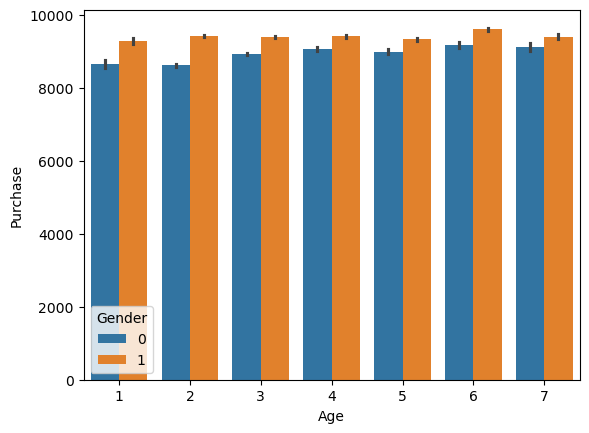

In [116]:
sns.barplot(x = 'Age',y = 'Purchase',hue = 'Gender',data = df)

## Insight
  From The Above Bar Plot We Observe That "Male" is the the higher Buyer Over Female  in all Age Category

<Axes: xlabel='Occupation', ylabel='Purchase'>

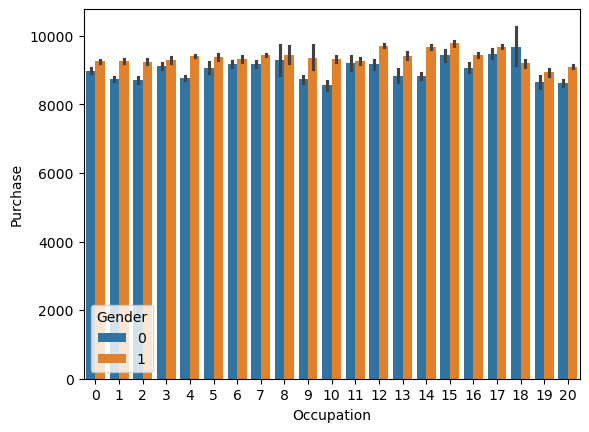

In [117]:
sns.barplot(x = 'Occupation',y = 'Purchase',hue = 'Gender',data = df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

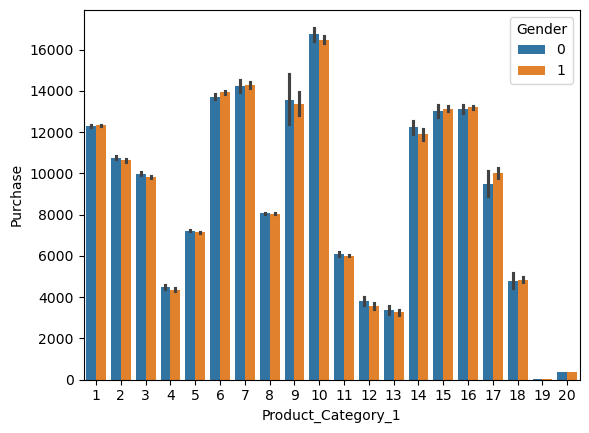

In [118]:
sns.barplot(x = 'Product_Category_1',y = 'Purchase',hue = 'Gender',data = df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

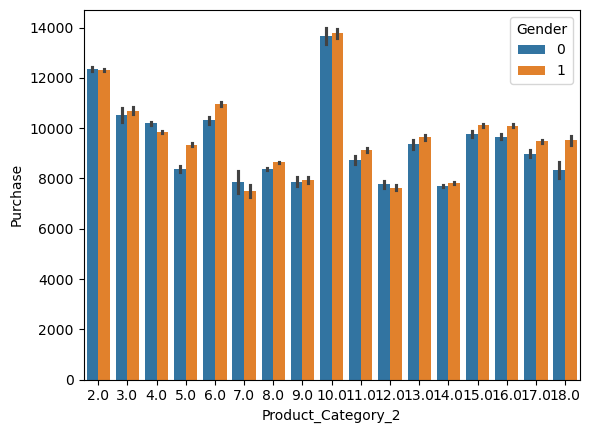

In [119]:
sns.barplot(x = 'Product_Category_2',y = 'Purchase',hue = 'Gender',data = df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

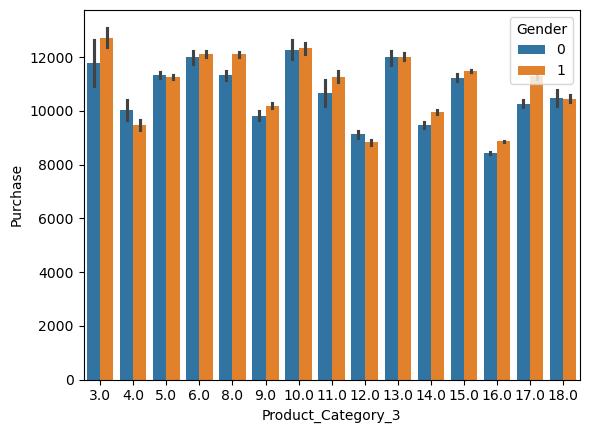

In [120]:
sns.barplot(x = 'Product_Category_3',y = 'Purchase',hue = 'Gender',data = df)

In [121]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


# Features Scaling

In [122]:
# test data 
df_test = df[df['Purchase'].isnull()]

In [123]:
# train data 
ds_train = df[~df['Purchase'].isnull()]

In [124]:
df_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [125]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [126]:
X = df_train.drop('Purchase',axis = 1)
y = df_train['Purchase']

In [127]:
X

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN


In [128]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33 , random_state = 42)

In [130]:
X_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
84432,1001062,P00351342,M,51-55,19,C,3,0,1,2.0,16.0
72724,1005172,P00237542,F,36-45,11,B,1,0,1,15.0,16.0
197032,1000415,P00116242,F,36-45,0,A,2,1,8,15.0,NaN
353704,1000496,P00016742,M,18-25,4,A,3,0,1,15.0,16.0
91198,1002010,P00002242,M,18-25,4,B,0,0,6,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
196106,1000264,P00089442,M,36-45,0,B,1,1,8,NaN,NaN
109474,1004842,P00174542,F,36-45,1,C,1,0,11,15.0,NaN
433228,1000718,P00249642,M,18-25,2,C,2,0,3,5.0,NaN
271831,1005882,P00270942,M,36-45,7,C,1,0,1,2.0,15.0


In [131]:

X_test.drop('Product_ID',axis=1,inplace=True)

In [132]:
X_test

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
84432,1001062,M,51-55,19,C,3,0,1,2.0,16.0
72724,1005172,F,36-45,11,B,1,0,1,15.0,16.0
197032,1000415,F,36-45,0,A,2,1,8,15.0,NaN
353704,1000496,M,18-25,4,A,3,0,1,15.0,16.0
91198,1002010,M,18-25,4,B,0,0,6,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...
196106,1000264,M,36-45,0,B,1,1,8,NaN,NaN
109474,1004842,F,36-45,1,C,1,0,11,15.0,NaN
433228,1000718,M,18-25,2,C,2,0,3,5.0,NaN
271831,1005882,M,36-45,7,C,1,0,1,2.0,15.0


In [133]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ValueError: could not convert string to float: 'P00120042'